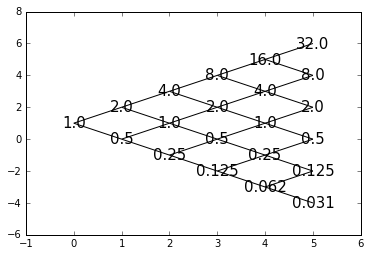

In [4]:
%matplotlib inline
import networkx as nx 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

r = 0.5
p = 0.5
q = 1-p
u = 2.0
d = 0.5

T=5
S0=1

def plot_tree(g):
    pos={}
    lab={}
    
    for n in g.nodes():
        pos[n]=(n[0],n[1])
        lab[n]=float(int(g.node[n]['value']*1000))/1000 # This is just to print only with 10^-2 precision
    
    elarge=g.edges(data=True)
    nx.draw_networkx_edges(g,pos,edgelist=elarge)
    nx.draw_networkx_labels(g,pos,lab,font_size=15,font_family='sans-serif')
    plt.show()
    
def graph_stock():
    S=nx.Graph()
    for i in range(0,T):
        j=-i+1
        while (j<i+2):
            S.add_edge((i,j),(i+1,j+1))
            S.add_edge((i,j),(i+1,j-1))
            j=j+2
            
    for n in S.nodes():
        
        if n[0]==0:
            S.node[n]['value']=S0
        i=n[0]
        j=n[1]
        if j>1:
            S.node[n]['value'] = S0*(u**(j-1))
        elif j==1:
            S.node[n]['value'] = S0
        else:
            S.node[n]['value'] = S0*(d**(1-j))
    return S

S=nx.Graph()
S =graph_stock()
plot_tree(S)
